In [1]:
import numpy as np
from sklearn.decomposition import PCA
import skimage as sk
import pandas as pd

### 1. Use 2 X 2 matrix, get Eval, Evecs

In [2]:
A= np.array([[4,2],[1,3]])
evals,evecs= np.linalg.eig(A)
print("eigen values: " , evals , "\n", "Eigen Vectors: " , evecs)

eigen values:  [5. 2.] 
 Eigen Vectors:  [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


### 2. Use df of 2 columns, 10 rows, calculate covariance, project to PC using Eigen and PCA libraries

In [3]:
np.random.normal(5, 2, 10)

array([6.64574996, 4.01495494, 2.26721165, 4.23701707, 4.4549631 ,
       0.27167737, 2.61787175, 2.41747475, 3.80362574, 3.29720322])

In [4]:
data = {
    'col1': np.random.normal(5, 2, 10),
    'col2': np.random.normal(6, 3, 10)
}
df = pd.DataFrame(data)
df

,col1,col2
0,7.805715,4.933990
1,3.956729,7.189593
2,3.585443,2.795672
3,5.665017,5.550896
4,3.922556,3.004971
5,6.781578,6.997661
6,3.160688,11.794644
7,6.851208,-0.776971
8,4.918894,3.023648
9,5.982740,1.683772


In [6]:
df.std()

col1    1.592656
col2    3.510782
dtype: float64

In [ ]:

df_zscaled = (df - df.mean()) / df.std()
df_zscaled

,col1,col2
0,1.596489,0.089496
1,-0.820220,0.731975
2,-1.053343,-0.519575
3,0.252384,0.265214
4,-0.841676,-0.459959
5,0.953452,0.677306
6,-1.320039,2.043663
7,0.997171,-1.537196
8,-0.216093,-0.454639
9,0.451876,-0.836285


In [21]:
cov_matrix = np.cov(df_zscaled.T)
cov_matrix

array([[1.        , 0.41690339],
       [0.41690339, 1.        ]])

In [33]:
evals, evecs = np.linalg.eig(cov_matrix)
evals

array([0.58309661, 1.41690339])

In [27]:
evecs

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [59]:
# sort the eigen values in descending order
evals_sorted=np.flip(np.sort(evals))
evals_sorted

[0.583097 1.416903]


array([1.416903, 0.583097])

In [61]:
evecs_sorted=np.flip(evecs)
evecs_sorted

array([[-0.707107,  0.707107],
       [-0.707107, -0.707107]])

In [63]:
projected_using_eigen= df_zscaled @ evecs_sorted
projected_using_eigen

,0,1
0,-1.006308,-0.473138
1,-1.003205,0.037000
2,-0.375203,-0.591724
3,0.606015,-0.131011
4,-0.784119,-0.399655
5,-0.540332,-0.807983
6,1.429398,0.919016
7,-0.469307,0.583595
8,2.614003,-0.636799
9,-0.470942,1.500698


In [65]:
# Use in-built PCA libraries and verify the eigen projection
pca = PCA(n_components=2)
projected_using_PCA = pca.fit_transform(df_zscaled)
projected_using_PCA

array([[ 1.006308, -0.473138],
       [ 1.003205,  0.037   ],
       [ 0.375203, -0.591724],
       [-0.606015, -0.131011],
       [ 0.784119, -0.399655],
       [ 0.540332, -0.807983],
       [-1.429398,  0.919016],
       [ 0.469307,  0.583595],
       [-2.614003, -0.636799],
       [ 0.470942,  1.500698]])

In [67]:
# Both are the same, hence proved

### 3. Verify the hand calculated values using python

In [74]:
A = np.array([[3, 1],[1, 3]])
U, S, VT = np.linalg.svd(A)
print(U)
print(S)
print(VT)

[[-0.707107 -0.707107]
 [-0.707107  0.707107]]
[4. 2.]
[[-0.707107 -0.707107]
 [-0.707107  0.707107]]


### 4. Use 2 X 3 matrix, get U, S, V using python

In [77]:
A = np.array([[3, 1, 1],
              [1, 3, 1]])

In [79]:
U, S, VT = np.linalg.svd(A)

In [81]:
print(U)
print(S)
print(VT)

[[-0.707107 -0.707107]
 [-0.707107  0.707107]]
[4.242641 2.      ]
[[-6.666667e-01 -6.666667e-01 -3.333333e-01]
 [-7.071068e-01  7.071068e-01  8.782155e-17]
 [-2.357023e-01 -2.357023e-01  9.428090e-01]]


### 5. Take an image, use SVD to compress

In [94]:
img= sk.io.imread('lena.jpg')

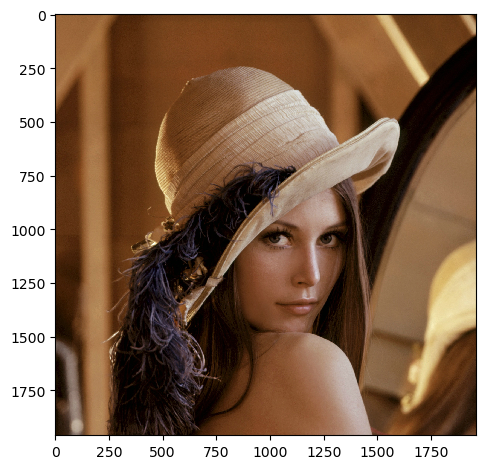

In [96]:
sk.io.imshow(img)

In [98]:
image= sk.color.rgb2gray(img)

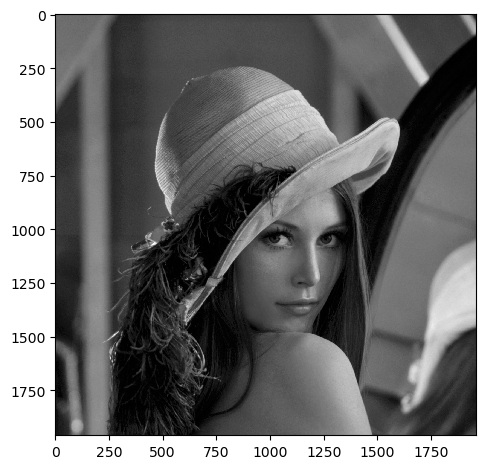

In [102]:
sk.io.imshow(image)

In [104]:
A = np.array(image)

In [106]:
A.shape

(1960, 1960)

In [108]:
U, S, VT = np.linalg.svd(A)

In [110]:
print(U)
print(S)
print(VT)

[[-0.021155 -0.007875 -0.001224 ...  0.006362 -0.016994 -0.003226]
 [-0.021151 -0.00801  -0.001117 ...  0.006652  0.012384  0.012168]
 [-0.02119  -0.008056 -0.001041 ...  0.023027  0.016616  0.025096]
 ...
 [-0.020406 -0.019055 -0.011541 ...  0.002868  0.027267 -0.049524]
 [-0.020401 -0.019021 -0.011268 ... -0.012027 -0.006365  0.041213]
 [-0.020415 -0.019005 -0.011272 ... -0.001921 -0.006062 -0.008982]]
[6.685350e+02 1.858055e+02 1.387654e+02 ... 2.250314e-04 1.108670e-04
 4.450498e-05]
[[-0.014984 -0.014875 -0.014788 ... -0.025932 -0.025887 -0.025866]
 [-0.013568 -0.013467 -0.013469 ...  0.040567  0.040393  0.040244]
 [ 0.002012  0.002451  0.002469 ...  0.04233   0.04258   0.042565]
 ...
 [ 0.01003  -0.021576  0.019826 ...  0.044235 -0.063397  0.018604]
 [ 0.002453 -0.011128  0.064209 ... -0.055147  0.030055 -0.003912]
 [ 0.026736 -0.035663  0.010695 ... -0.004754  0.005929 -0.00018 ]]


In [114]:
# this might have 1960 eigen values (looking at the dimension, compress to top 50 eigen values
k=50
compressed_img = np.dot(U[:, :k], np.dot(np.diag(S[:k]), VT[:k, :]))

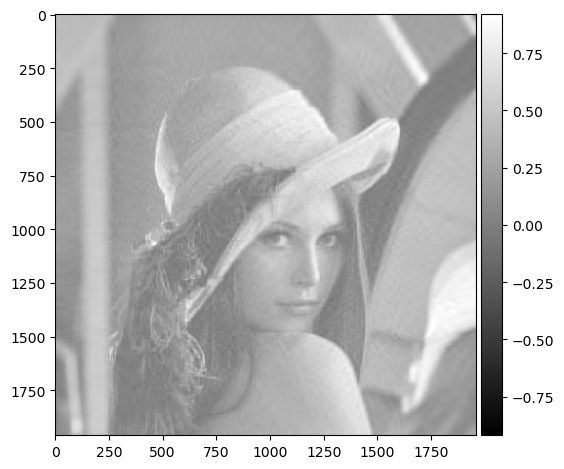

In [118]:
sk.io.imshow(compressed_img, cmap='gray')